In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv('housingprice', header = None) #read from dataset
data
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,64,2.3
1,74,2.6
2,86,3.9
3,117,3.8
4,166,3.9


In [75]:
X

0     64
1     74
2     86
3    117
4    166
5    170
6    200
7    210
8    250
Name: 0, dtype: int64

In [76]:
y

0    2.3
1    2.6
2    3.9
3    3.8
4    3.9
5    4.2
6    4.0
7    4.3
8    4.1
Name: 1, dtype: float64

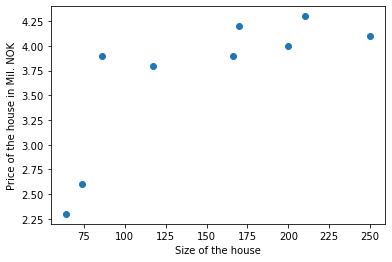

In [77]:
plt.scatter(X, y)
plt.xlabel('Size of the house')
plt.ylabel('Price of the house in Mil. NOK')
plt.show()

$J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{i})-y^i)}^2$

$h_{\theta}(x)=\theta_1 x + \theta_2$

Minimize $J(\theta_1,\theta_2)$

$\theta_2=0$

$h_{\theta}(x)=\theta_1 x$

Minimize $J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}-y^i)}^2$

In [78]:
def J(X, y, t):
    temp = t * X - y
    return np.sum(np.power(temp, 2)) / (2*m)

In [79]:
def cost(X,y,theta):
    l = []
    for i in theta:
        l.append(float(J(X,y,i)))
    return l

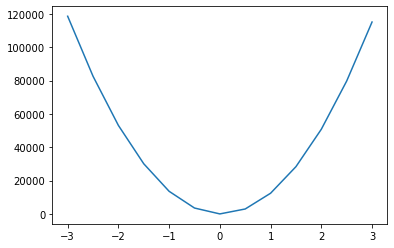

In [80]:
theta = np.arange(-3.0, 3.5, 0.5)
plt.plot(theta, cost(X,y,theta))
plt.show()

In [81]:
theta1 = np.arange(-20.0, 20.5, 0.5)
theta2 = np.arange(-20.0, 20.5, 0.5)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)

In [83]:
n_rows = data.shape[0]
X=data.iloc[:,0].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)

In [84]:
X

array([[  1.,  64.],
       [  1.,  74.],
       [  1.,  86.],
       [  1., 117.],
       [  1., 166.],
       [  1., 170.],
       [  1., 200.],
       [  1., 210.],
       [  1., 250.]])

In [85]:
def J(X, y, t):
    m=len(y)
    predictions=X.dot(t)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

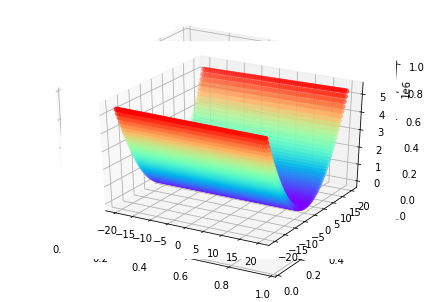

In [87]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
zaxis = cost(X,y,theta)
# ax.scatter(xaxis, yaxis, zaxis, zdir='z', c= 'red')
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
plt.show()

In [88]:
#Try with another Boston pricing data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [89]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target

In [90]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [101]:
X = df.values
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))
X

array([[-0.09854803, -0.07324046, -0.09530797, ..., -0.07703793,
         0.45967093, -0.0915527 ],
       [-0.0985185 , -0.09855692, -0.08861317, ..., -0.07352175,
         0.45967093, -0.08570178],
       [-0.09851853, -0.09855692, -0.08861317, ..., -0.07352175,
         0.4539466 , -0.09288884],
       ...,
       [-0.09847146, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45967093, -0.09062443],
       [-0.09840278, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45481861, -0.08944299],
       [-0.09849023, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45967093, -0.08747393]])

In [102]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[-0.16852158, -0.00782005],
       [-0.2375389 ,  0.01422814],
       [-0.2381318 ,  0.01980384],
       ...,
       [-0.19463736,  0.0013194 ],
       [-0.19339687,  0.00598006],
       [-0.19576699,  0.00141922]])

In [103]:
X_approx_pca = pca.inverse_transform(X)
ratio_pca = np.mean((df.values-X_approx_pca).T.dot(df.values-X_approx_pca))/np.mean(df.values.T.dot(df.values))
ratio_pca

0.9998998146227941

In [105]:
X.shape

(506, 2)

In [106]:
def J(X, y, t):
    temp = np.dot(X,t) - y
    return np.sum(np.power(temp, 2)) / (2*m)

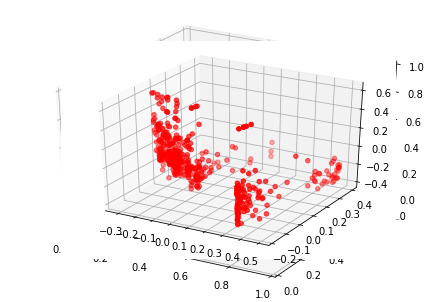

In [107]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in X]
yaxis = [row[1] for row in X]
ax.scatter(xaxis, yaxis, y, zdir='z', c= 'red')
plt.show()

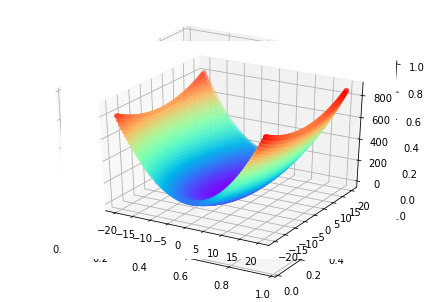

In [108]:
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_1,\theta_2)$ for $(j=0 and j=1)$ 

In [109]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)
computeCost(X,y)

10.547233435807348

In [113]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(J(X,y,theta))
    
    return theta, J_history
theta,J_history = gradientDescent(X,y,[0,0],0.01,10)
print("h(x) ="+str(round(theta[0],4))+" + "+str(round(theta[1],4))+"x1")

h(x) =-0.0024 + -0.0002x1


In [58]:
data = pd.read_csv('CASP.csv') #read from dataset
data
X = data[['F8', 'F9']] # read first column
y = data['RMSD'] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [59]:
#Normalize X and y
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))

In [60]:
X

,F8,F9
0,0.091500,-0.186996
1,-0.088500,0.100395
2,-0.117072,0.107011
3,0.000071,0.113329
4,-0.082786,0.134531
...,...,...
45725,0.040071,0.056895
45726,-0.045643,0.038014
45727,-0.068500,0.073569
45728,-0.082786,0.026972


In [61]:
y

0        0.454092
1       -0.082267
2        0.072693
3        0.385850
4        0.010166
           ...   
45725   -0.189844
45726   -0.058457
45727    0.124171
45728    0.097265
45729    0.527571
Name: RMSD, Length: 45730, dtype: float64

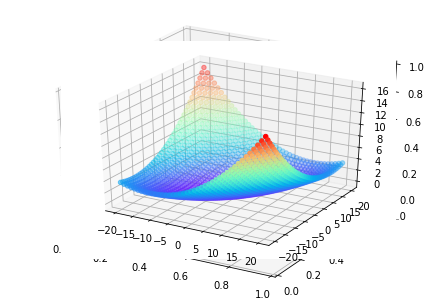

In [62]:
theta1 = np.arange(-20.0, 21, 1)
theta2 = np.arange(-20.0, 21, 1)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)
theta
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\frac{\partial}{\partial\theta_0}J(\theta_0,\theta_2) = \frac{\partial}{\partial\theta_0}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i} + \theta_0 -y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}$

$\frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_1}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}x^i$

In [63]:
iterations = 1000
alpha = 10
print(iterations, alpha)
def gradientDescent(X, y, theta1, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta1) - y
        temp = np.dot(X.T, temp)
        theta1 = theta1 - (alpha/m) * temp
    return theta1
theta1 = gradientDescent(X, y, [-20,20], alpha, iterations)

print(theta1)
print(J(X,y,theta1))

1000 10
[0.12275375 0.20729762]
0.042160868505990774
